In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [7]:
df1=df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [4]:
df1.shape

(1258,)

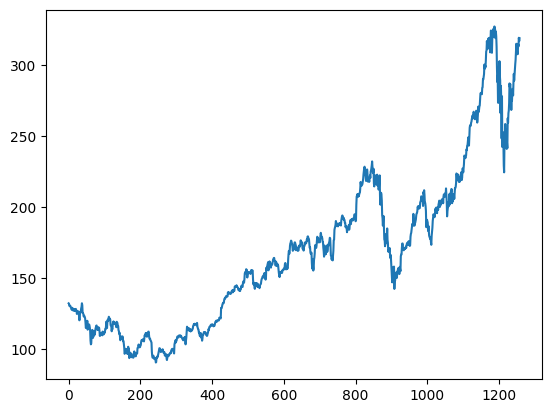

In [6]:
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1


array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]], shape=(1258, 1))

In [17]:
training_size = int(len(df1) * 0.6 )
test_size = int(len(df1)) - training_size
train_data, test_data = df1[0: training_size,: ], df1[training_size:len(df1), :1 ]

In [18]:
training_size, test_size

(754, 504)

In [19]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [20]:
def create_dataset(dataset, timestep = 1):
    dataX, dataY = [], []
    for i in range (len(dataset) - timestep - 1):
        dataX.append(dataset[i: (i+ timestep ), 0])
        dataY.append(dataset[i+timestep , 0])
        return np.array(dataX) , np.array(dataY)
    

In [22]:
timestep = 100
X_train, y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [23]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 0.1696994  0.16727181 0.16794731
  0.16473866 0.16174111 0.1581525  0.15654817 0.16271215 0.1614878
  0.1554927  0.15443722 0.15730811 0.15604154 0.15849025 0.15308621
  0.15735033 0.15490163 0.15946129 0.15688592 0.1537195  0.14434687
  0.14812547 0.15308621 0.15241071 0.15055307 0.14924428 0.13607194
  0.12551718 0.13906949 0.14911762 0.14890653 0.15401503 0.16115005
  0.16583636 0.17618002 0.17060711 0.14725998 0.14700667 0.14422021
  0.13691632 0.13949168 0.13784514 0.13522756 0.13071012 0.11863548
  0.10259225 0.1058009  0.10466098 0.10630752 0.12403952 0.09773706
  0.10512539 0.10474542 0.10816516 0.11323144 0.11044499 0.10415435
  0.09419066 0.06510175 0.05395592 0.0565735  0.08169383 0.09533058
  0.09689268 0.09465507 0.07337668 0.09288187 0.08456472 0.07992063
  0.09275521 0.0836359  0.09385291 0.10077683 0.10542092 0.10951617
  0.11006502 0.09955248 0.09756818 0.10499873 0.09735709 0.10124124
  0.10411213 0.10288778 0.09330406 0.07903403 0.0

In [24]:
print(X_test.shape),
print(y_test.shape)

(1, 100)
(1,)
